# This code benchmarks to a dataset from John Blundy for the Cascades given in the paper

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Thermobar as pt

In [2]:
out=pt.import_excel('Chompi_Benchmarking.xlsx', sheet_name='Thermobar')
Liq=out['Liqs']
all=out['my_input']

In [3]:
# This just checks you get the same result if you provide unnormalized compositions
out_unnorm=pt.import_excel('Chompi_Benchmarking.xlsx', sheet_name='Thermobar_norm_test')
Liq_unnorm=out_unnorm['Liqs']
all_unnorm=out_unnorm['my_input']
Liq_unnorm.head()

,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,Sample_ID_Liq
0,62.999936,0.344886,14.250394,2.550897,0.0,1.280706,3.272214,3.871559,2.338498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,57.000087,0.543748,15.529910,3.964026,0.0,3.336512,5.667848,3.763644,1.103315,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,67.099879,0.258902,12.544911,1.749424,0.0,0.329844,1.272034,3.758640,3.892039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,54.443981,0.708064,16.523700,5.276497,0.0,3.361470,5.785755,3.762803,1.047365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,66.395251,0.213034,13.244721,1.893611,0.0,0.178388,0.861994,4.454954,3.667139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [8]:
df_out=pt.calculate_CHOMPI(liq_comps=Liq_unnorm,  deltaNNO=all['∆NNO (log units)'],
                            T_K_guess=all['T erupt (°C)'], N_rep=100)
df_out.head()

,final_assessment,SSR,In Cali Range?,T_K_calc,P_kbar_calc,XH2O_mol_calc,XCO2XH2O,SiO2_calc,TiO2_calc,Al2O3_calc,...,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Fe3Fet_Liq,Sample_ID_Liq,NiO_Liq,CoO_Liq,CO2_Liq,H2O_Liq
0,Strong_positive,0.890216,True,1173.709528,3.504459,0.725600,0.378169,69.893687,0.401833,16.037467,...,1.408777,3.599436,4.258715,2.572347,0.0,0,0.0,0.0,0.0,0.0
1,Permissive_positive,14.786599,True,1276.842769,4.881374,0.539418,0.853850,59.635015,0.940393,19.167929,...,3.670163,6.234633,4.140009,1.213647,0.0,1,0.0,0.0,0.0,0.0
2,Strong_positive,1.483696,True,1121.009366,2.267972,0.732973,0.364307,72.840975,0.262233,14.364388,...,0.362842,1.399290,4.134659,4.281403,0.0,2,0.0,0.0,0.0,0.0
3,Permissive_positive,8.305913,True,1289.833057,5.757290,0.407235,1.455582,57.456685,1.030918,19.591490,...,3.697594,6.364292,4.139059,1.152095,0.0,3,0.0,0.0,0.0,0.0
4,Strong_positive,0.799768,True,1110.734404,1.259607,0.814489,0.227763,72.458598,0.246746,14.493137,...,0.196227,0.948193,4.900449,4.033852,0.0,4,0.0,0.0,0.0,0.0


## Testing predicted liquids

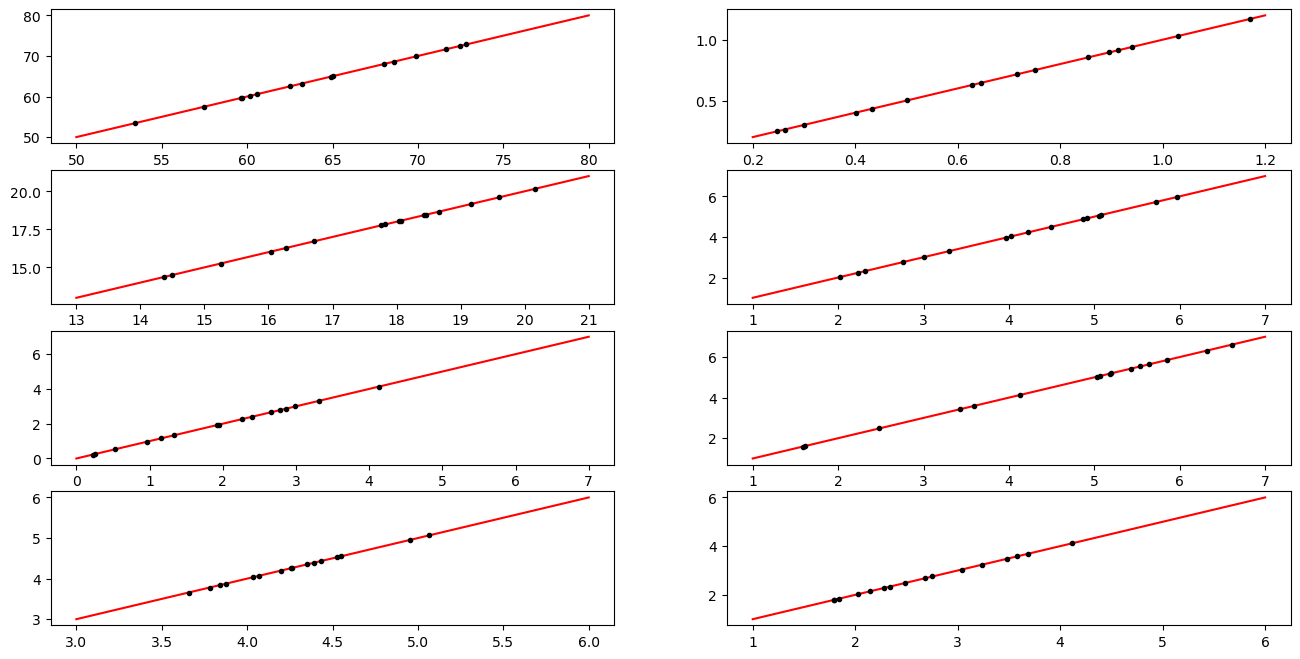

In [9]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(16,8))
ax1.plot([50, 80], [50, 80], '-r')
ax1.plot(all['SiO2_calc'], df_out['SiO2_calc'], '.k')

ax2.plot([0.2, 1.2], [0.2, 1.2], '-r')
ax2.plot(all['TiO2_calc'], df_out['TiO2_calc'], '.k')

ax3.plot([13, 21], [13, 21], '-r')
ax3.plot(all['Al2O3_calc'], df_out['Al2O3_calc'], '.k')

ax4.plot([1, 7], [1, 7], '-r')
ax4.plot(all['FeOt_calc'], df_out['FeOt_calc'], '.k')

ax5.plot([0, 7], [0, 7], '-r')
ax5.plot(all['MgO_calc'], df_out['MgO_calc'], '.k')

ax6.plot([1, 7], [1, 7], '-r')
ax6.plot(all['CaO_calc'], df_out['CaO_calc'], '.k')

ax7.plot([3, 6], [3, 6], '-r')
ax7.plot(all['Na2O_calc'], df_out['Na2O_calc'], '.k')

ax8.plot([1, 6], [1, 6], '-r')
ax8.plot(all['K2O_calc'], df_out['K2O_calc'], '.k')

## Testing predicted temps, P and fluid compositions

Text(0, 0.5, 'XH2O Thermobar')

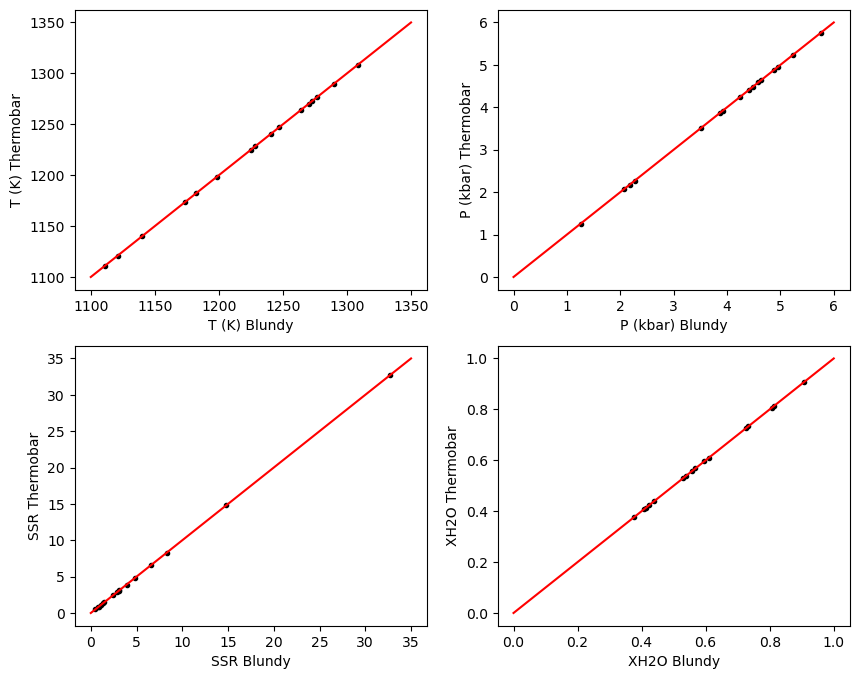

In [14]:
all
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,8))
ax1.plot(all['T (K)'], df_out['T_K_calc'], '.k')
ax1.plot([1100, 1350], [1100, 1350], '-r')
ax1.set_xlabel('T (K) Blundy')
ax1.set_ylabel('T (K) Thermobar')

ax2.plot(all['P (kbar)'], df_out['P_kbar_calc'], '.k')
ax2.plot([0, 6], [0, 6], '-r')
ax2.set_xlabel('P (kbar) Blundy')
ax2.set_ylabel('P (kbar) Thermobar')

ax3.plot(all['SSR'], df_out['SSR'], '.k')
ax3.plot([0, 35], [0, 35], '-r')
ax3.set_xlabel('SSR Blundy')
ax3.set_ylabel('SSR Thermobar')

ax4.plot(all['XH2O'], df_out['XH2O_mol_calc'], '.k')
ax4.plot([0, 1], [0, 1], '-r')
ax4.set_xlabel('XH2O Blundy')
ax4.set_ylabel('XH2O Thermobar')